<center><h1>Arabic Social Media Sentiment Analysis</center></h1> 

<center><h1>Moroccan Arabic Dialect classification </center><h1>

<center><h1> WISD-----Web Mining </center><h1>


---
By: **Lamgarraj Mohamed & Zakaria elghamch**


---



# **Loading data**

**Training data**

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('../input/sentiment-analysis-on-moroccan-arabic-dialect/train.csv',sep=',',encoding='utf-8');
#data = pd.read_csv('/content/drive/MyDrive/WeBMining/train.csv', sep=',',encoding='utf-8')
data.head

<bound method NDFrame.head of         ID                                            comment  label
0        1  انا اوصي من هذا المنبر الكل للتوجه الى مراكز ا...      1
1        2  \nهناك الكثير لا يفهم المقصود كورونا ليست صعبة...      1
2        3  الحمد لله ارقام مقبولة مقارنة بدول المنطقة لول...      1
3        4  انا شخصيا أؤيد ما فرضته السلطات من ضرورة الإدل...      1
4        5  \nنفس الشئ في مدينة برشيد مراكز التلقيح مغلقة ...      1
...    ...                                                ...    ...
1915  1916  \nوالله حتى دمرونا وتعداو علينا شي ميقراش\nشي ...      0
1916  1917                    لقاح موت و سم فيقو ا عباد الله       0
1917  1918  اللقاح غير آمن، ولا يمكن تجاهل عشرات شهادات ال...      0
1918  1919  لنكن واقعيين…لا يجب فرظ التلقيح بالقوة..انا تل...      0
1919  1920  \n#التنسيقية_الوطنية_للمغاربة_الرافضين_للتلقيح...      0

[1920 rows x 3 columns]>

In [2]:
y=data["label"]
y=np.array(y)

In [3]:
y.shape

(1920,)

**Reading Data to Predict stage: 1**

In [4]:
test=pd.read_csv('../input/sentiment-analysis-on-moroccan-arabic-dialect/test_stage1.csv', sep=',',encoding='utf-8')
test.head

<bound method NDFrame.head of       ID                                            comment
0      1  التلقيح نعمة لانه فابور,الناس في مصر را كتخلص ...
1      2             أثبت التلقيح أهميته في الحد من الوفيات
2      3  انا ملقح جوج مرات والحمد لله عندي المناعة ديال...
3      4  كنــا متأكديــن من أن جلالـة الملــك سيجعل الت...
4      5  شعب أناني مشبع بثقافة الخرافة والمؤامرة… بنادم...
..   ...                                                ...
235  236  \nحنا المشكل ديالنا هما الفيروسات البشرية أما ...
236  237  \nالسيد بلفقيه، اسمحوا لي بسؤال : هل الملقحون ...
237  238  اللقاح هدفه هو تقليص عدد سكان العالم لأنه أصبح...
238  239  \nاخوتي في الله انه و بعد يقين في الله قررت ان...
239  240  \nانضمو الى اتحاد المغاربة الرافضين لجواز التل...

[240 rows x 2 columns]>

# **prétraitement version:1**

In [5]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
#from google.colab import drive
import csv
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

In [18]:
try:
  stopwords = nltk.corpus.stopwords.words('arabic')
except:
  nltk.download('stopwords')
  stopwords = nltk.corpus.stopwords.words('arabic')

sw_file = urlopen("https://raw.githubusercontent.com/mohataher/arabic-stop-words/master/list.txt").read().decode('utf-8')
sw = [x for x in sw_file.split("\n")]
stopwords = set(stopwords + sw)

def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1\1', text)# keep only 1 repeat

arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

def remove_lt2(text):
  return re.sub(r'\b\w{,2}\b', '',text)

def remove_diacritics(text):
    return re.sub(arabic_diacritics, '', text)
    
def remove_punctuations(text):
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    #english_punctuations = string.punctuation
    #all_punctuations = set(arabic_punctuations + english_punctuations)
    for p in arabic_punctuations:
        if p in text:
            text = text.replace(p, '')
    return text

def remove_mention(text):
    return re.sub(r'@\S+', '', text)

def allow_only_ar(text):
    return re.sub(r'[^\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD]+', ' ', text)

def hashtag_match(match_object):
        return match_object.group(1).replace('_', ' ')

def normalize_hashtag(text):
    return re.sub(r'#(\S+)', hashtag_match, text)

def remove_stopwords(text):
  word_tokens = wordpunct_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w in stopwords]
  return " ".join(filtered_sentence)

def process_text(text):
    
    clean_text = normalize_hashtag(text)
    clean_text = remove_mention(clean_text)
    clean_text = allow_only_ar(clean_text)
    clean_text = remove_punctuations(clean_text)
    clean_text = remove_diacritics(clean_text)
    clean_text = remove_repeating_char(clean_text)
    clean_text = remove_lt2(clean_text)
    clean_text = remove_stopwords(clean_text)
    
    tokens = []
    st = ISRIStemmer()
    for w in wordpunct_tokenize(clean_text):
      tokens.append(st.stem(w))
    return tokens

In [ ]:
traindata = []
for line in data["comment"]:
   word_list = process_text(line)
   traindata.append(word_list)

In [ ]:
predictdata = []
for line in test["comment"]:
   word_list = process_text(line)
   predictdata.append(word_list)

# **Prétraitement version:2 (by hanane)**

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#stop_words = stopwords.words('arabic')
stp = open("../input/stops/list.txt", "r",encoding='utf-8')
stops=stp.read()
import re
#
import string
translator = str.maketrans('', '', string.punctuation)


#Stemming:
#Arabic Light Stemming
from nltk.stem.isri import ISRIStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
stopwords = stops.split()

In [15]:
def remove_StopWords(text):
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stopwords]  
    text = ' '.join([i for i in filtered_sentence])
    return text

In [16]:
def removeStopWords(text):
    #word_tokens = word_tokenize(text) 
    #filtered_sentence = [w for w in word_tokens if not w in stop_words]  
    #text = ' '.join([i for i in filtered_sentence])
    #return text
    stop_words=[]
    #stop_words=['متفاءيل','فعال','امشي','التعجيل','انا مع فرض التلقيح','انا مع','التدابير الاحترازية','مع','لقح','فرض ','عزء ','صحي','حجر','صحي','حجر ','خيف','كمم','كلخ','بلد','وطن','تضر','روبا','صرح ','روبا','حمي','خوي','ورس','ورس ','وطن','لور','رجع','دفع','نحم ','بلد','رسي','ندر','لقح','لحل','لحل','حمد ','لله','كنا','مع','المناسب','حل','طبيع','الطبيعية','ازمة','حمي']
    stop_words=['خرف' , 'عالميه', 'غاندير' ,'لخرافة' ,'ملك' ,'بد' , 'العلماء' , 'لسنا' ,'والعلماء','بفضل', 'شجعو','خرف','يشككون','يشكك']
    j=0
    word_tokens = word_tokenize(text) 
    
    for w in word_tokens:
        if w in stop_words:
            word_tokens = ['انا','مع']
            #word_tokens[1] = 'مع'
    
    filtered_sentence = [w for w in word_tokens]  
    text = ' '.join([i for i in filtered_sentence])
    return text

def NormalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    return text

def arabic_diacritics(text):
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', text)
    return text

def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

def stemming(text):
    st = ISRIStemmer()
    stemmed_words = []
    word_tokens = word_tokenize(text) 
    for w in word_tokens:
        stemmed_words.append(st.stem(w))
    stemmed_words = " ".join(stemmed_words)
    return stemmed_words

def remove_english_characters(text):
        return re.sub(r'[a-zA-Z]+', '', text)

In [9]:
for index, row in data.iterrows():
    #row['comment'] = removeStopWords(row['comment'])
    row['comment'] = NormalizeArabic(row['comment'])
    #row['comment'] = arabic_diacritics(row['comment'])
    row['comment'] = removeNumbers(row['comment'])
    row['comment'] = row['comment'].translate(translator)
    row['comment'] = stemming(row['comment'])
    new_df = pd.DataFrame({'comment': [row['comment']]}, index=[index])
    data.update(new_df)

In [10]:
traindata2=data

In [11]:
for index, row in test.iterrows():
    row['comment'] = removeStopWords(row['comment'])
    row['comment'] = NormalizeArabic(row['comment'])
    #row['comment'] = arabic_diacritics(row['comment'])
    row['comment'] = removeNumbers(row['comment'])
    row['comment'] = row['comment'].translate(translator)
    row['comment'] = stemming(row['comment'])
    new_test = pd.DataFrame({'comment': [row['comment']]}, index=[index])
    test.update(new_test)

In [12]:
predictdata2=test

# **Wordcloud**

downloading and unzipping arabic font: /opt/conda/lib/python3.7/site-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /opt/conda/lib/python3.7/site-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /opt/conda/lib/python3.7/site-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


Text(0.5, 1.0, "May's word cloud")

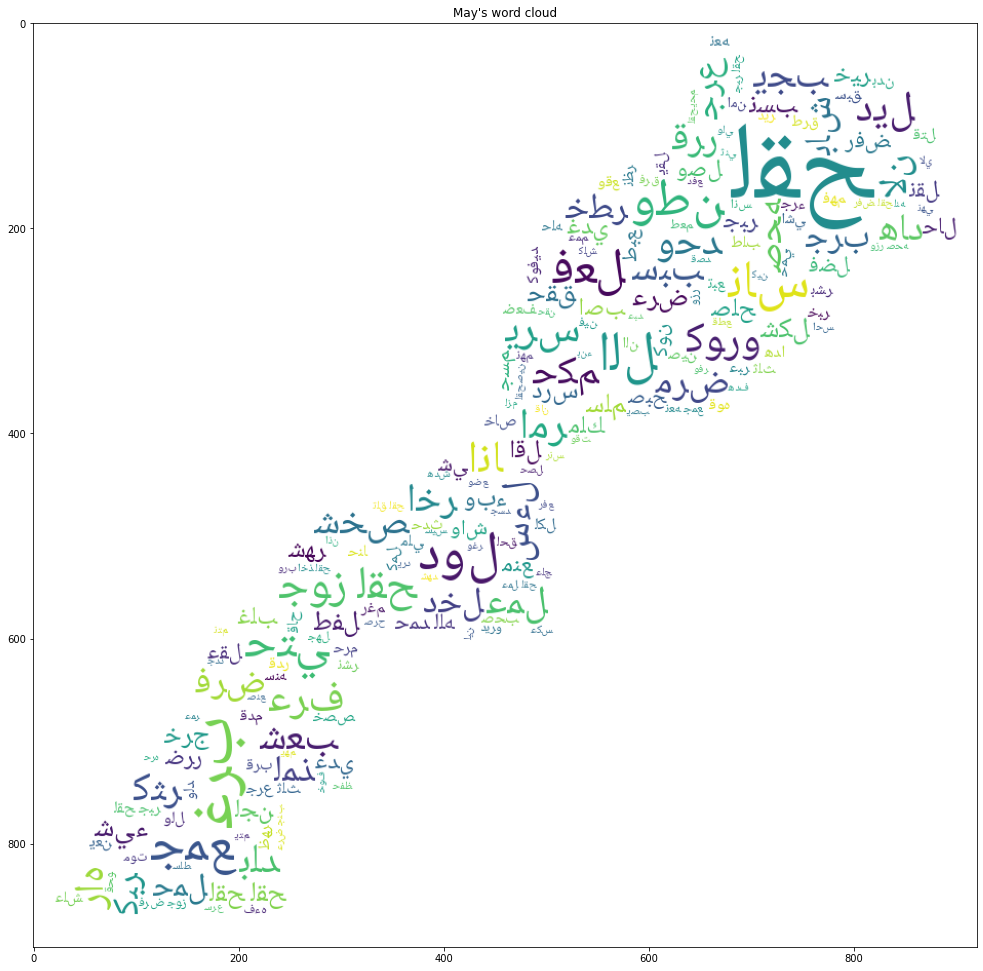

In [19]:
try:
  from ar_wordcloud import ArabicWordCloud
  from ar_wordcloud.utils import read_mask_image
except:
  !pip install ar_wordcloud
  from ar_wordcloud import ArabicWordCloud
  from ar_wordcloud.utils import read_mask_image

from imageio import imread

image = imread('https://i.imgur.com/cOegrUM.png')

mask_img = np.array(image) 

sentences  = data["comment"].tolist()
sentences_as_one_string = " ".join(sentences)

sentences_as_one_string = allow_only_ar(sentences_as_one_string)
sentences_as_one_string = remove_punctuations(sentences_as_one_string)
sentences_as_one_string = remove_StopWords(sentences_as_one_string)

awc = ArabicWordCloud(background_color="white",mask=mask_img)
plt.figure(figsize=(17,17))
wc = awc.from_text(sentences_as_one_string)
wc.to_file('may_wc.png')
plt.imshow(wc)
plt.title("May's word cloud")

# **Features extraction (Vectorisation)**

# **TFIDF**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tf_idf1=TfidfVectorizer(sublinear_tf=True,min_df=1,encoding='latin-1',ngram_range=(0,1))

In [22]:
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=False,sublinear_tf=True)

In [23]:
tf_idf2 = TfidfVectorizer(ngram_range=(1, 2),
                         sublinear_tf=True,encoding='latin_1')

In [24]:
X_train_tfidf = tf_idf.fit_transform(traindata2["comment"])
X_val_tfidf = tf_idf.transform(predictdata2["comment"])

In [25]:
X_train_tfidf1 = tf_idf1.fit_transform(traindata2["comment"])
X_val_tfidf1 = tf_idf1.transform(predictdata2["comment"])

In [26]:
X_train_tfidf2 = tf_idf2.fit_transform(traindata2["comment"])
X_val_tfidf2 = tf_idf2.transform(predictdata2["comment"])

In [27]:
X_train_tfidf2.shape

(1920, 52720)

In [28]:
X_val_tfidf2.shape

(240, 52720)

In [29]:
X_train_tfidf.shape

(1920, 112610)

In [30]:
X_val_tfidf.shape

(240, 112610)

In [31]:
from sklearn.model_selection import train_test_split
X_traintf, X_testtf, y_traintf, y_testtf = train_test_split(X_train_tfidf, y, test_size=0.2, random_state=13)
X_traintf1, X_testtf1, y_traintf1, y_testtf1 = train_test_split(X_train_tfidf1, y, test_size=0.2, random_state=13)
X_traintf2, X_testtf2, y_traintf2, y_testtf2 = train_test_split(X_train_tfidf2, y, test_size=0.2, random_state=13)

# **Count Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


XPros1 = CountVectorizer(analyzer = process_text, dtype="uint8",max_features=31).fit_transform(traindata).toarray()
X_predict1 = CountVectorizer(analyzer = process_text, dtype="uint8",max_features=31).fit_transform(predictdata).toarray()
XPros2 = CountVectorizer(analyzer = process_text, dtype="uint8",max_features=784).fit_transform(traindata2["comment"]).toarray()
X_predict2 = CountVectorizer(analyzer = process_text, dtype="uint8",max_features=784).fit_transform(predictdata2["comment"]).toarray()
#y = df["vote"].apply(lambda x: 'positive' if x >= 0 else 'negative')
#y=data["label"]

X_train, X_test, y_train, y_test = train_test_split(XPros1, y, test_size=0.2, random_state=13)
X_train2, X_test2, y_train2, y_test2 = train_test_split(XPros2, y, test_size=0.2, random_state=13)


# **Word2vec**

In [ ]:
class WordVecVectorizer(object):
    def __init__(self, word2vec, max_len=50):
        self.word2vec = word2vec
        self.dim = word2vec.vector_size
        self.max_len = max_len

    def fit(self, X, y):
        return self    

    def transform(self, X):
        """
        Transforms a document to one vector of a size = word2vec.vector_size (dim), 
        by taking the mean of th vectors of every word.
        The output size will be of shape (X.shape[0], self.dim).
        """
        return np.array([
            np.mean([self.word2vec[w] for w in texts.split() if w in self.word2vec]
                    or [1e-12 * np.random.normal(scale=0.6, size=self.dim)], axis=0)
            for texts in X
        ])
        
    def instance_transform(self, X):
        """
        Transforms a document to a 3D array based on the word2vec vector transformation of every instance (word),
        while the words that exceeds the maximum allowable length (max_len) will be removed.
        If the sentance is less than max_len, it will be padded with zeros.
        The output size will be of shape (X.shape[0], self.max_len, self.dim).
        """
        return np.array([
            [self.word2vec[w] if w in self.word2vec else 1e-12 * np.random.normal(scale=0.6, size=self.dim) for i, w in enumerate(texts.split()) if i<self.max_len] + [1e-12 * np.random.normal(scale=0.6, size=self.dim)]*(self.max_len-min(self.max_len, len(texts.split())))
            for texts in X
        ])

In [ ]:
process_text

In [ ]:
corpus = []
for line in data["comment"]:
   word_list = process_text(line)
   corpus.append(word_list)

In [ ]:
corpus[0:1]

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec( sentences=corpus,size=300,window=10,min_count=1)

In [ ]:
words = list(w2v_model.wv.vocab)
print(words)

In [ ]:
x_w2V=w2v_model.f

# **Machine Learning models for classification**

# **SDGclassifier**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = SGDClassifier(random_state=0, class_weight='balanced',
                    loss='log', penalty='elasticnet')
grid = {
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.5, 0.8, 1],
}
# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_tfidf1, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
sgdmodel=SGDClassifier(random_state=0, class_weight='balanced',
                    loss='log', penalty='elasticnet',alpha= 1e-05, l1_ratio= 0.05)
sgdmodel.fit(X_train_tfidf1, y)
sgdlabels=sgdmodel.predict(X_val_tfidf1)

In [ ]:
sgdlabels

# **pour valider le model et enregistrer prediction**

In [36]:
l=[]
for i in range(120):
  l.append(1)
for i in range(120):
  l.append(0)

In [37]:
from sklearn import metrics
print(metrics.classification_report(labels, l))  # essay N° 135 / top model: SVM (85%)version saved with pickle

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       126
           1       0.82      0.87      0.85       114

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



In [ ]:
id_list= [i for i in range(1,241)]
df = pd.DataFrame({'ID':id_list , 'label':labels })#Nblabels
df.to_csv('./submission.csv',index=False)

# **NBclassifier**

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       185
           1       0.84      0.62      0.71       199

    accuracy                           0.74       384
   macro avg       0.76      0.74      0.74       384
weighted avg       0.76      0.74      0.74       384



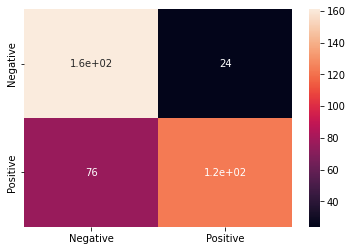

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_traintf2,y_traintf2)
y_predict_test = NB_classifier.predict(X_testtf2)
cm = confusion_matrix(y_testtf2,y_predict_test)
sns.heatmap(cm, annot=True, xticklabels = ['Negative', 'Positive'],yticklabels=['Negative','Positive'])
print(classification_report(y_testtf2,y_predict_test))

In [39]:
NB_classifier.fit(X_train_tfidf2,y)

MultinomialNB()

In [40]:
Nblabels = NB_classifier.predict(X_val_tfidf2)

In [41]:
Nblabels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

# **SVM**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [30, 10, 1.0]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_tfidf2, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [32]:
from sklearn.svm import SVC
svm1=SVC(C= 1, gamma='scale', kernel='sigmoid')

In [33]:
svm1.fit(X_train_tfidf2,y)

SVC(C=1, kernel='sigmoid')

In [34]:
labels=svm1.predict(X_val_tfidf2)

In [35]:
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

**Linear SVM**

In [42]:
from sklearn import svm
lsvm = svm.LinearSVC(class_weight='balanced')
lsvm.fit(X_train_tfidf2,y)

LinearSVC(class_weight='balanced')

In [43]:
lsvmlabels=lsvm.predict(X_val_tfidf2)

In [44]:
lsvmlabels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

tfidf

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
model = SVC()
model.fit(X_traintf,y_traintf)
y_predict_test = model.predict(X_testtf)
cm = confusion_matrix(y_testtf,y_predict_test)
sns.heatmap(cm, annot=True, xticklabels = ['Negative', 'Positive'],yticklabels=['Negative','Positive'])
print(classification_report(y_testtf,y_predict_test))

In [45]:
from sklearn.svm import NuSVC
nusvm = NuSVC(probability=True, kernel='poly', degree=1)

In [46]:
nusvm.fit(X_train_tfidf2,y)

NuSVC(degree=1, kernel='poly', probability=True)

In [47]:
labels=nusvm.predict(X_val_tfidf2)

In [48]:
labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
id_list= [i for i in range(1,241)]
df = pd.DataFrame({'ID':id_list , 'label':labels })
df.to_excel('/content/Lamgarraj.xlsx',index=False)

In [ ]:
data_xls = pd.read_excel('/content/Lamgarraj.xlsx', index_col=None)
data_xls.to_csv('/content/LamgarrajZaki.csv', encoding='utf-8',index=False)

# **Vote Majoritaire**

In [ ]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[
        ('svm', svm1),('adaboost',ada),('svc_model', RForest),('cnb',model_cnb),("sdg",sgdmodel),("NB_classifier",NB_classifier)], voting='soft')
eclf = eclf.fit(X_train_tfidf2, y)


In [ ]:
votemajlabels= eclf.predict(X_val_tfidf2)

In [ ]:
votemajlabels

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = VotingClassifier(
          estimators=[('lr',LogisticRegression()), ('gboost',GradientBoostingClassifier()),]
          , voting='soft')

In [ ]:
p = [{'lr__C':[1,2],'gboost__n_estimator':[10,20]}]

grid = GridSearchCV(clf,p,cv=5,scoring='neg_log_loss')
grid.fit(X_train_tfidf2,y)

# **Complement NB naive bayes**

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
model_cnb = ComplementNB()

model_cnb.fit(X_train_tfidf2, y)
y_pred_cnb = model_cnb.predict(X)


print(metrics.classification_report(y_testtf, y_pred_cnb))

In [ ]:
y_pred= model_cnb.predict(X_val_tfidf)

In [ ]:
y_pred

In [ ]:
l=[]
for i in range(120):
  l.append(1)
for i in range(120):
  l.append(0)

In [ ]:
print(metrics.classification_report(y_pred, l))

# **Save and read model**

In [ ]:
import pickle
filename = '/content/drive/MyDrive/WeBMining/SVM2.sav'
pickle.dump(svm1, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('/content/drive/MyDrive/WeBMining/NBmodel.sav', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [ ]:
ynew=np.array(y_pred)

In [ ]:
id_list = list(range(1,241))
df = pd.DataFrame({'ID':id_list , 'label':labels })
df.to_excel('/content/Lamgarraj.xlsx',index=False)

In [ ]:
data_xls = pd.read_excel('/content/Lamgarraj.xlsx', index_col=None)
data_xls.to_csv('/content/LamgarrajZaki.csv', encoding='utf-8',index=False)

# **RAndom forest**

In [ ]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100,300]
max_features = ['auto','sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_tfidf2, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RForest = RandomForestClassifier(max_features='sqrt', n_estimators= 100)

In [ ]:
RForest.fit(X_train_tfidf2,y)

In [ ]:
rflabels=RForest.predict(X_val_tfidf2)

In [ ]:
rflabels

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = RForest.predict(X_testtf)
cm = confusion_matrix(y_testtf,y_predict_test)
sns.heatmap(cm, annot=True, xticklabels = ['Negative', 'Positive'],yticklabels=['Negative','Positive'])
print(classification_report(y_testtf,y_predict_test))

In [ ]:
y_pred=model.predict(X_val_tfidf)

In [ ]:
id_list = list(range(1,241))
df = pd.DataFrame({'ID':id_list , 'label':y_pred })
df.to_excel('/content/Lamgarraj.xlsx',index=False)

In [ ]:
data_xls = pd.read_excel('/content/Lamgarraj.xlsx', index_col=None)
data_xls.to_csv('/content/LamgarrajZaki.csv', encoding='utf-8',index=False)

# **CHI2**

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
cc=SelectKBest(chi2, k=10000)

f_train = cc.fit_transform(X_train_tfidf2, y)
f_test = cc.transform(X_val_tfidf2)

In [ ]:
f_train.shape

# **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
# define the model
model = AdaBoostClassifier()


In [ ]:
ada = AdaBoostClassifier(SVC(probability=True,kernel='linear'))#

In [ ]:
ada.fit(X_train_tfidf2,y)

In [ ]:
ada2 = AdaBoostClassifier(SGDClassifier(loss='hinge',alpha= 1e-05, l1_ratio= 0.05), algorithm='SAMME')#alpha= 1e-05, l1_ratio= 0.05

In [ ]:
ada2.fit(X_train_tfidf2,y)

In [ ]:
adalabels=ada.predict(X_val_tfidf2)

In [ ]:
adalabels

# **LOGistic Regression**

In [ ]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_tfidf2, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
len(y)

In [ ]:
logm = LogisticRegression(C= 100, penalty= 'l2', solver= 'liblinear')
logm.fit(X_train_tfidf1,y)

In [ ]:
loglabel=logm.predict(X_val_tfidf1)

In [ ]:
loglabel

In [ ]:
ynew=np.array(y_pred)

# **CNN1**

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
embedding_dim = 16

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(1000 + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

In [ ]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0001))

In [ ]:
X_train_tfidf2.shape

In [ ]:
y_train=np.array(y)

In [ ]:
epochs = 10
history = model.fit(
    X_train_tfidf2,
    y_train,
    epoch=epochs)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = model.predict(X_test)


In [ ]:
len(y_test)

In [ ]:
len(y_predict_test)

In [ ]:
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True, xticklabels = ['Negative', 'Positive'],yticklabels=['Negative','Positive'])
print(classification_report(y_test,y_predict_test))

# **Deep Learning**

In [ ]:
def ensemble_CNN_BiGRU(filters = 100, kernel_size = 3, activation='relu', 
                   input_dim = None, output_dim=300, max_length = None, emb_matrix = None):
  
    # Channel 1D CNN
    input1 = tf.keras.Input(shape=(max_length,1420))
    embeddding1 = tf.keras.layers.Embedding(input_dim=input_dim, 
                            output_dim=output_dim, 
                            input_length=max_length, 
                            input_shape=(max_length, ),
                            # Assign the embedding weight with word2vec embedding marix
                            weights = [emb_matrix],
                            # Set the weight to be not trainable (static)
                            trainable = False)(input1)
    conv1 = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
                   kernel_constraint= MaxNorm( max_value=3, axis=[0,1]))(embeddding1)
    pool1 = MaxPool1D(pool_size=2, strides=2)(conv1)
    flat1 = Flatten()(pool1)
    drop1 = Dropout(0.5)(flat1)
    dense1 = Dense(10, activation='relu')(drop1)
    drop1 = Dropout(0.5)(dense1)
    out1 = Dense(1, activation='sigmoid')(drop1)
    
    # Channel BiGRU
    input2 = Input(shape=(max_length,))
    embeddding2 = Embedding(input_dim=input_dim, 
                            output_dim=output_dim, 
                            input_length=max_length, 
                            input_shape=(max_length, ),
                            # Assign the embedding weight with word2vec embedding marix
                            weights = [emb_matrix],
                            # Set the weight to be not trainable (static)
                            trainable = False,
                            mask_zero=True)(input2)
    gru2 = Bidirectional(GRU(64))(embeddding2)
    drop2 = Dropout(0.5)(gru2)
    out2 = Dense(1, activation='sigmoid')(drop2)
    
    # Merge
    merged = concatenate([out1, out2])
    
    # Interpretation
    outputs = Dense(1, activation='sigmoid')(merged)
    model = Model(inputs=[input1, input2], outputs=outputs)
    
    # Compile
    model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
model=ensemble_CNN_BiGRU(filters = 100, kernel_size = 3, activation='relu', 
                   input_dim = None, output_dim=300, max_length = None, emb_matrix = None)

DEEP3

In [ ]:
def tcn_model(kernel_size = 3, activation='relu', input_dim = None, 
                   output_dim=300, max_length = None, emb_matrix = None):
    
    inp = Input( shape=(max_length,))
    x = Embedding(input_dim=input_dim, 
                  output_dim=output_dim, 
                  input_length=max_length,
                  # Assign the embedding weight with word2vec embedding marix
                  weights = [emb_matrix],
                  # Set the weight to be not trainable (static)
                  trainable = False)(inp)
    
    x = SpatialDropout1D(0.1)(x)
    
    x = TCN(128,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn1')(x)
    x = TCN(64,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn2')(x)
    
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(16, activation="relu")(conc)
    conc = Dropout(0.1)(conc)
    outp = Dense(1, activation="sigmoid")(conc)    

    model = Model(inputs=inp, outputs=outp)
    model.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [ ]:
X_train.shape[0]

# **4CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
input_shape = (28,28, 1)
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))

In [ ]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cnn4.summary()

In [ ]:
X_train.shape

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
history4 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1
          )

In [ ]:
score4 = cnn4.evaluate(X_predict, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

# **tfidf2**

In [ ]:

from gensim import corpora, models

class TFIDF:
    
    def __init__(self, documents):
        self.tokenized_document = [[token for token in document.lower().split()] for document in documents]
        self.dictionary = corpora.Dictionary(self.tokenized_document)
        self.corpus_doc2bow_vectors = [self.dictionary.doc2bow(tok_doc) for tok_doc in self.tokenized_document]
        self.tfidf_model = models.TfidfModel(self.corpus_doc2bow_vectors, id2word=self.dictionary, normalize=False)
        self.corpus_tfidf_vectors = self.tfidf_model[self.corpus_doc2bow_vectors]
        

In [ ]:

from gensim import similarities
from prettytable import PrettyTable
query_bow_vector=[]
for comment in data["comment"] :
     tf_idf = TFIDF(comment)
     corpus_tfidf_vectors = tf_idf.corpus_tfidf_vectors
     dictionary = tf_idf.dictionary
     tfidf_model = tf_idf.tfidf_model
     query_bow_vector.append(dictionary.doc2bow(process_text(comment)))
     query_tfidf_vector = tfidf_model[query_bow_vector]

In [ ]:
query_bow_vector